### `Problem statement` -  Given various features about a customer like Gender, SeniorCitizen, Partner, Dependents etc.. , predict if the customer will churn or not.

### Major steps invloved in EDA
- Check for Duplicates
- Handle missing values
- Handle outliers
- Descriptive Statistics
- Data Visualization
- Feature Scaling: Standardization & Normalization
- Binning & Encoding

## Import the required library

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
#pip install numpy


In [106]:
#pip install --upgrade numpy==1.21.4

In [107]:
np.__version__

'1.21.4'

In [108]:
# check threadpoolctl version
import threadpoolctl as thr

In [109]:
#check threadpoolctl version once

thr.__version__

'3.1.0'

## Load the data

In [110]:
df = pd.read_csv(r'E:\Excel_files\Machine Learning\churn_dataset.csv',skipinitialspace=True)

In [111]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [112]:
df.shape

(7043, 21)

In [113]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [115]:
df.TotalCharges= df.TotalCharges.astype('float64')

In [116]:
# df.TotalCharges.str.isspace().value_counts()         # checking for empty speces

In [117]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [118]:
df.TotalCharges[df.TotalCharges.isnull()]

488    NaN
753    NaN
936    NaN
1082   NaN
1340   NaN
3331   NaN
3826   NaN
4380   NaN
5218   NaN
6670   NaN
6754   NaN
Name: TotalCharges, dtype: float64

In [119]:
df[df.TotalCharges.isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [120]:
df.TotalCharges.isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [121]:
df.TotalCharges.replace(np.nan,df.TotalCharges.mean(),inplace = True)     # Replace null Values with mean

In [122]:
df.TotalCharges.isnull().sum()

0

In [123]:
# check the duplicates

df.duplicated()
df.duplicated().value_counts()

False    7043
dtype: int64

In [124]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


<AxesSubplot: xlabel='SeniorCitizen'>

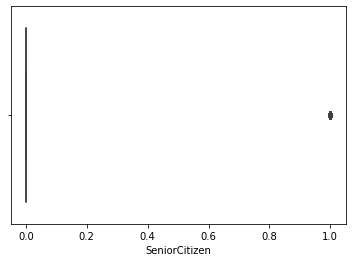

In [125]:
sns.boxplot(x = df.SeniorCitizen)

<AxesSubplot: xlabel='tenure'>

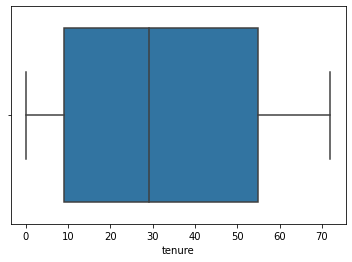

In [126]:
sns.boxplot(x = df.tenure)

<AxesSubplot: xlabel='MonthlyCharges'>

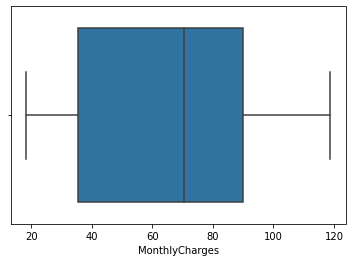

In [127]:
sns.boxplot(x = df.MonthlyCharges)

<AxesSubplot: xlabel='TotalCharges'>

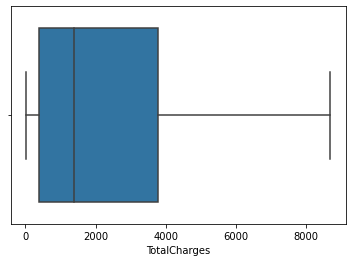

In [128]:
sns.boxplot(x = df.TotalCharges)

In [129]:
# Identify the outliers

Q1,Q2,Q3 = tuple(df.MonthlyCharges.quantile(q = [0.25, 0.5, 0.75 ]).values)

In [130]:
print(Q1, Q2, Q3)

35.5 70.35 89.85


In [131]:
IQR = Q3-Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

print(IQR, UL, LL)

54.349999999999994 171.375 -46.02499999999999


In [132]:
(df[(df.MonthlyCharges > UL) | (df.MonthlyCharges < LL)]).count()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [133]:
df.skew()

C:\Users\HP PC\AppData\Local\Temp\ipykernel_4196\1665899112.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.962394
dtype: float64

<AxesSubplot: xlabel='SeniorCitizen', ylabel='count'>

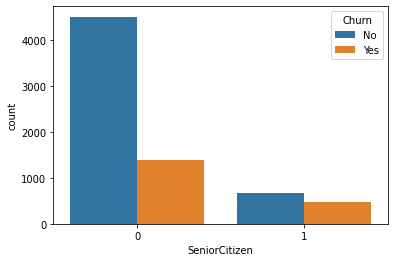

In [134]:
sns.countplot(data = df, x =df.SeniorCitizen, hue = 'Churn')

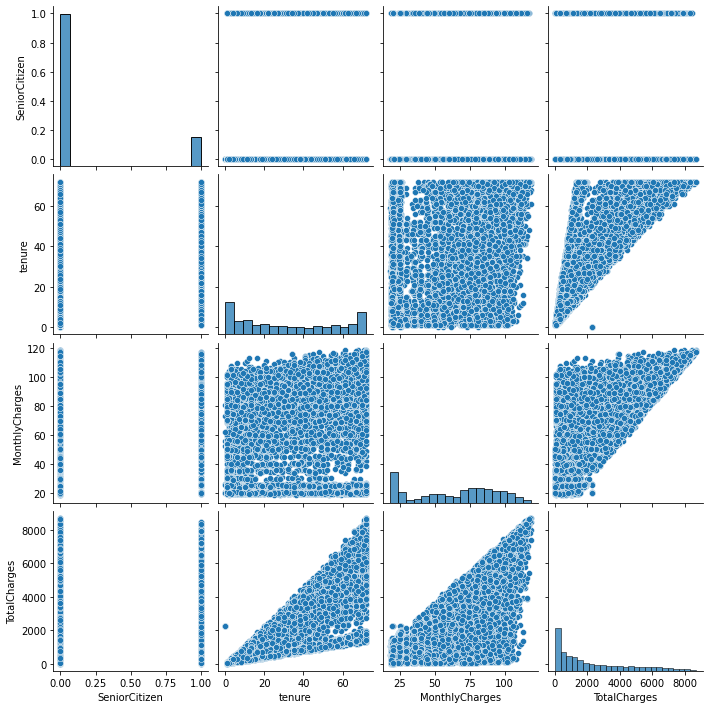

In [135]:
sns.pairplot(df)

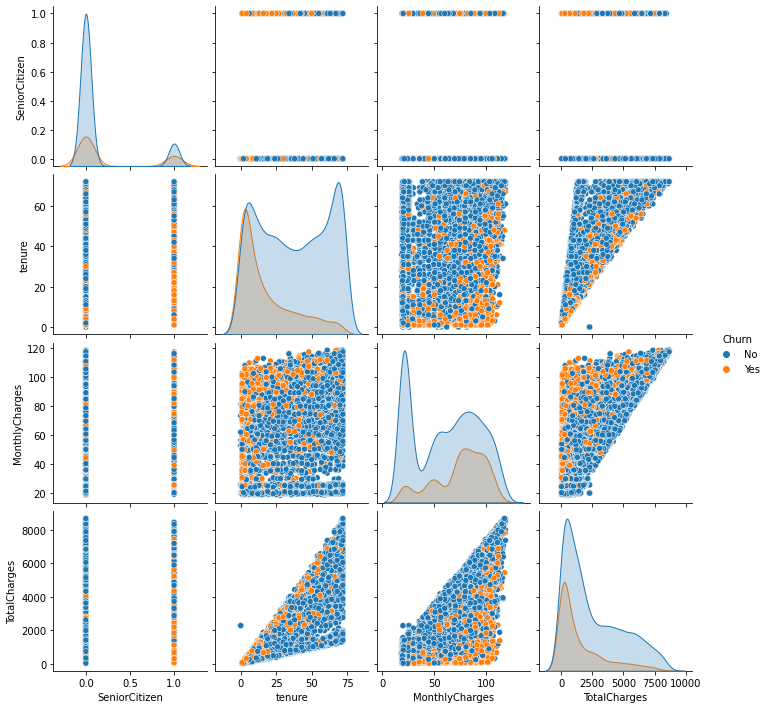

In [136]:
sns.pairplot(df, hue = 'Churn')

In [137]:
# plt.figure(figsize=(15,9))
# plt.subplot(311)
# sns.barplot(y=df.SeniorCitizen, x = df.MonthlyCharges)
# 
# plt.subplot(312)
# sns.boxplot(y=df.MonthlyCharges, x = df.TotalCharges)
# 
# plt.subplot(313)
# sns.boxplot(y=df.tenure, x = df.TotalCharges);

## Machine Learning

## a. Identify the inputs (X) and output (y)

In [138]:
# Identify the inputs (X) and output (y)

y = df['Churn']
X = df [['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges']]

In [139]:
y.value_counts(normalize = True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

In [140]:
# split into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.75, random_state = 420)

In [141]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
4282,Female,0,Yes,Yes,52,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,One year,No,Bank transfer (automatic),101.25,5301.10
77,Female,0,Yes,Yes,8,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,No,Mailed check,54.65,482.25
3203,Female,0,Yes,No,72,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),88.05,6520.80
6867,Male,0,No,No,67,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.95,1311.75
1703,Male,0,No,No,11,No,No phone service,DSL,No,Yes,No,Yes,No,No,Month-to-month,Yes,Electronic check,35.65,425.10


In [142]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5282, 19) (5282,)
(1761, 19) (1761,)


## b. Seperate the Categorial and Numerical Columns:

In [143]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
4282,Female,0,Yes,Yes,52,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,One year,No,Bank transfer (automatic),101.25,5301.10
77,Female,0,Yes,Yes,8,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,No,Mailed check,54.65,482.25
3203,Female,0,Yes,No,72,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),88.05,6520.80
6867,Male,0,No,No,67,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.95,1311.75
1703,Male,0,No,No,11,No,No phone service,DSL,No,Yes,No,Yes,No,No,Month-to-month,Yes,Electronic check,35.65,425.10


In [144]:
X_train.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object

In [145]:
X_train_cat = X_train.select_dtypes(include=['object'])

X_train_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
4282,Female,Yes,Yes,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,One year,No,Bank transfer (automatic)
77,Female,Yes,Yes,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,No,Mailed check
3203,Female,Yes,No,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic)
6867,Male,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic)
1703,Male,No,No,No,No phone service,DSL,No,Yes,No,Yes,No,No,Month-to-month,Yes,Electronic check


In [146]:
X_train_num = X_train.select_dtypes(include=['float64','int64'])

X_train_num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
4282,0,52,101.25,5301.10
77,0,8,54.65,482.25
3203,0,72,88.05,6520.80
6867,0,67,19.95,1311.75
1703,0,11,35.65,425.10


## c. Scaling the Numerical Features

In [147]:
X_train_num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
4282,0,52,101.25,5301.10
77,0,8,54.65,482.25
3203,0,72,88.05,6520.80
6867,0,67,19.95,1311.75
1703,0,11,35.65,425.10


In [148]:
# scaling the numeroical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num),
                                   columns = X_train_num.columns,
                                   index = X_train_num.index)

X_train_num_rescaled.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
4282,-0.434861,0.794075,1.211682,1.332329
77,-0.434861,-0.996363,-0.330029,-0.798109
3203,-0.434861,1.607911,0.774974,1.871564
6867,-0.434861,1.404452,-1.478042,-0.431383
1703,-0.434861,-0.874288,-0.958624,-0.823375


In [149]:
X_train_num.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5282.000000,5282.000000,5282.000000,5282.000000
mean,0.159031,32.485612,64.625511,2287.497568
std,0.365739,24.577318,30.229014,2262.120150
min,0.000000,0.000000,18.700000,18.800000
25%,0.000000,9.000000,35.000000,393.012500
50%,0.000000,29.000000,70.300000,1413.600000
75%,0.000000,56.000000,89.850000,3801.600000
max,1.000000,72.000000,118.750000,8684.800000


In [150]:
print('Number of Numerical Feature:', scaler.n_features_in_)
print('Mean of each column:', scaler.mean_)
print('std of each column:', np.sqrt(scaler.var_))

Number of Numerical Feature: 4
Mean of each column: [1.59030670e-01 3.24856115e+01 6.46255112e+01 2.28749757e+03]
std of each column: [3.65704684e-01 2.45749917e+01 3.02261523e+01 2.26190601e+03]


## d. Applying OneHotEncoding on Categorical Columns

In [151]:
X_train_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
4282,Female,Yes,Yes,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,One year,No,Bank transfer (automatic)
77,Female,Yes,Yes,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,No,Mailed check
3203,Female,Yes,No,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic)
6867,Male,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic)
1703,Male,No,No,No,No phone service,DSL,No,Yes,No,Yes,No,No,Month-to-month,Yes,Electronic check


In [152]:
X_train_cat['gender'].value_counts(normalize = True)


Male      0.503976
Female    0.496024
Name: gender, dtype: float64

In [153]:
X_train_cat['Partner'].value_counts(normalize = True)

No     0.512685
Yes    0.487315
Name: Partner, dtype: float64

In [154]:
X_train_cat['Dependents'].value_counts(normalize = True)

No     0.69841
Yes    0.30159
Name: Dependents, dtype: float64

In [155]:
X_train_cat['PhoneService'].value_counts(normalize = True)

Yes    0.899091
No     0.100909
Name: PhoneService, dtype: float64

In [156]:
X_train_cat['MultipleLines'].value_counts(normalize = True)

No                  0.475767
Yes                 0.423324
No phone service    0.100909
Name: MultipleLines, dtype: float64

In [157]:
X_train_cat['InternetService'].value_counts(normalize = True)

Fiber optic    0.439796
DSL            0.341727
No             0.218478
Name: InternetService, dtype: float64

In [158]:
X_train_cat['OnlineSecurity'].value_counts(normalize = True)

No                     0.496403
Yes                    0.285119
No internet service    0.218478
Name: OnlineSecurity, dtype: float64

In [159]:
X_train_cat['DeviceProtection'].value_counts(normalize = True)

No                     0.435630
Yes                    0.345892
No internet service    0.218478
Name: DeviceProtection, dtype: float64

In [160]:
X_train_cat['TechSupport'].value_counts(normalize = True)

No                     0.488641
Yes                    0.292881
No internet service    0.218478
Name: TechSupport, dtype: float64

In [161]:
X_train_cat['StreamingTV'].value_counts(normalize = True)

No                     0.396251
Yes                    0.385271
No internet service    0.218478
Name: StreamingTV, dtype: float64

In [162]:
X_train_cat['StreamingMovies'].value_counts(normalize = True)

No                     0.397766
Yes                    0.383756
No internet service    0.218478
Name: StreamingMovies, dtype: float64

In [163]:
X_train_cat['Contract'].value_counts(normalize = True)

Month-to-month    0.549602
Two year          0.239493
One year          0.210905
Name: Contract, dtype: float64

In [164]:
X_train_cat['PaperlessBilling'].value_counts(normalize = True)

Yes    0.590496
No     0.409504
Name: PaperlessBilling, dtype: float64

In [165]:
X_train_cat['PaymentMethod'].value_counts(normalize = True)

Electronic check             0.334911
Mailed check                 0.231162
Bank transfer (automatic)    0.223590
Credit card (automatic)      0.210337
Name: PaymentMethod, dtype: float64

In [166]:
# OneHotEncoding the categorical features

from sklearn.preprocessing import OneHotEncoder

encoder_ = OneHotEncoder(drop= 'first', min_frequency= 1000, sparse_output= False)

# column names are (annoyingly) Lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)\

X_train_cat_ohe = pd.DataFrame(encoder_.fit_transform(X_train_cat),
                              columns = encoder_.get_feature_names_out(X_train_cat.columns),
                              index = X_train_cat.index)

X_train_cat_ohe.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_infrequent_sklearn,MultipleLines_Yes,MultipleLines_infrequent_sklearn,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4282,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
77,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3203,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
6867,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1703,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [167]:
encoder_.categories_

[array(['Female', 'Male'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'No phone service', 'Yes'], dtype=object),
 array(['DSL', 'Fiber optic', 'No'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['Month-to-month', 'One year', 'Two year'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Bank transfer (automatic)', 'Credit card (automatic)',
        'Electronic check', 'Mailed check'], dtype=object)]

In [168]:
# OneHotEncoding the categorical features

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse_output=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_cat_ohe = pd.DataFrame(encoder.fit_transform(X_train_cat), 
                               columns=encoder.get_feature_names_out(X_train_cat.columns), 
                               index = X_train_cat.index)

X_train_cat_ohe.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4282,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
77,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3203,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
6867,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1703,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


## f. Concatinating the Encoded Categorical Features and Rescaled Numerical Features:

In [169]:
X_train_transformed = pd.concat([X_train_num_rescaled, X_train_cat_ohe], axis=1)

X_train_transformed.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4282,-0.434861,0.794075,1.211682,1.332329,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
77,-0.434861,-0.996363,-0.330029,-0.798109,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3203,-0.434861,1.607911,0.774974,1.871564,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
6867,-0.434861,1.404452,-1.478042,-0.431383,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1703,-0.434861,-0.874288,-0.958624,-0.823375,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


## g. Preparing Test Data

In [170]:
X_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
5243,Male,0,No,No,19,Yes,No,Fiber optic,No,No,No,Yes,No,Yes,One year,Yes,Credit card (automatic),87.70,1725.95
3122,Male,1,Yes,Yes,68,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),19.50,1193.55
4447,Male,0,Yes,No,68,Yes,Yes,Fiber optic,Yes,Yes,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,107.70,7320.90
5029,Female,0,Yes,No,7,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),50.30,355.10
385,Male,1,Yes,No,11,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.95,214.75


In [171]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1761 entries, 5243 to 5397
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            1761 non-null   object 
 1   SeniorCitizen     1761 non-null   int64  
 2   Partner           1761 non-null   object 
 3   Dependents        1761 non-null   object 
 4   tenure            1761 non-null   int64  
 5   PhoneService      1761 non-null   object 
 6   MultipleLines     1761 non-null   object 
 7   InternetService   1761 non-null   object 
 8   OnlineSecurity    1761 non-null   object 
 9   OnlineBackup      1761 non-null   object 
 10  DeviceProtection  1761 non-null   object 
 11  TechSupport       1761 non-null   object 
 12  StreamingTV       1761 non-null   object 
 13  StreamingMovies   1761 non-null   object 
 14  Contract          1761 non-null   object 
 15  PaperlessBilling  1761 non-null   object 
 16  PaymentMethod     1761 non-null   objec

In [172]:
X_test_cat = X_test.select_dtypes(include=['object'])

X_test_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
5243,Male,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,Yes,One year,Yes,Credit card (automatic)
3122,Male,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic)
4447,Male,Yes,No,Yes,Yes,Fiber optic,Yes,Yes,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check
5029,Female,Yes,No,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic)
385,Male,Yes,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check


In [173]:
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

X_test_num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
5243,0,19,87.70,1725.95
3122,1,68,19.50,1193.55
4447,0,68,107.70,7320.90
5029,0,7,50.30,355.10
385,1,11,19.95,214.75


In [174]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)

X_test_num_rescaled.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
5243,-0.434861,-0.548753,0.763395,-0.248263
3122,2.299586,1.445143,-1.492929,-0.483640
4447,-0.434861,1.445143,1.425074,2.225292
5029,-0.434861,-1.037055,-0.473944,-0.854323
385,2.299586,-0.874288,-1.478042,-0.916372


In [175]:
X_test_cat_ohe = pd.DataFrame(encoder.transform(X_test_cat), 
                               columns=encoder.get_feature_names_out(X_test_cat.columns), 
                               index = X_test_cat.index)
X_test_cat_ohe.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5243,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
3122,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4447,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
5029,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
385,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [176]:
X_test_transformed = pd.concat([X_test_num_rescaled, X_test_cat_ohe], axis=1)

X_test_transformed.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5243,-0.434861,-0.548753,0.763395,-0.248263,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
3122,2.299586,1.445143,-1.492929,-0.483640,1.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4447,-0.434861,1.445143,1.425074,2.225292,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
5029,-0.434861,-1.037055,-0.473944,-0.854323,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
385,2.299586,-0.874288,-1.478042,-0.916372,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [177]:
X_test_transformed.isnull().sum()

SeniorCitizen                            0
tenure                                   0
MonthlyCharges                           0
TotalCharges                             0
gender_Male                              0
Partner_Yes                              0
Dependents_Yes                           0
PhoneService_Yes                         0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV_Yes                          0
StreamingMovies_No internet service      0
StreamingMo

## Logistic Regression

In [178]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_transformed, y_train)

LogisticRegression()

## Prediction

In [179]:
# Prediction

y_test_pred = classifier.predict(X_test_transformed)

In [180]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()


,Actual,Predicted
5243,No,No
3122,No,No
4447,No,No
5029,No,No
385,Yes,No


## Evaluation

In [181]:
# calculate the accuracy of class predictions

from sklearn import metrics
# from sklearn.metrics import accuracy_score

Accuracy_LR = metrics.accuracy_score(y_test, y_test_pred)
print('Accuracy: ', Accuracy_LR )

Accuracy:  0.8097671777399205


In [182]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
5243,No,No
3122,No,No
4447,No,No
5029,No,No
385,Yes,No


## Training - Support Vector Classifier

In [183]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train_transformed, y_train)

y_test_pred = classifier.predict(X_test_transformed)

Accuracy_SVC = metrics.accuracy_score(y_test, y_test_pred)
print('Accuracy: ',Accuracy_SVC )

Accuracy:  0.8069278818852924


In [184]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
5243,No,No
3122,No,No
4447,No,No
5029,No,No
385,Yes,No


## Training - KNN Classifier

In [185]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train_transformed, y_train)

y_test_pred = classifier.predict(X_test_transformed)
 
Accuracy_KNN = metrics.accuracy_score(y_test, y_test_pred)
print('Accuracy: ',Accuracy_KNN )

Accuracy:  0.7660420215786485


In [186]:
#y_test_pred = classifier.predict(X_test_transformed)

In [187]:
# metrics.accuracy_score(y_test, y_test_pred)

In [188]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
5243,No,No
3122,No,No
4447,No,No
5029,No,No
385,Yes,No


## Training - DT Classifier

In [189]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train_transformed, y_train)

y_test_pred = classifier.predict(X_test_transformed)

Accuracy_DTC = metrics.accuracy_score(y_test, y_test_pred)
print('Accuracy: ',Accuracy_DTC )

Accuracy:  0.7416240772288473


In [190]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
5243,No,No
3122,No,No
4447,No,Yes
5029,No,No
385,Yes,No


## Training - Ramdom Forest Classifier

In [191]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train_transformed, y_train)

y_test_pred = classifier.predict(X_test_transformed)

Accuracy_RFC = metrics.accuracy_score(y_test, y_test_pred)
print('Accuracy: ',Accuracy_RFC )

Accuracy:  0.8001135718341851


In [192]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
5243,No,No
3122,No,No
4447,No,No
5029,No,No
385,Yes,No


## Boosting: Gradient Boosted Decision Tree

In [193]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier()
classifier.fit(X_train_transformed, y_train)

y_test_pred = classifier.predict(X_test_transformed)

Accuracy_GBDT = metrics.accuracy_score(y_test, y_test_pred)
print('Accuracy: ',Accuracy_GBDT )

Accuracy:  0.8131743327654741


In [194]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
5243,No,No
3122,No,No
4447,No,No
5029,No,No
385,Yes,No


## Boosting: ADA Boosting

In [195]:
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier()
classifier.fit(X_train_transformed, y_train)

y_test_pred = classifier.predict(X_test_transformed)

Accuracy_ADAB = metrics.accuracy_score(y_test, y_test_pred)
print('Accuracy: ',Accuracy_ADAB )

Accuracy:  0.8131743327654741


In [196]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
5243,No,No
3122,No,No
4447,No,No
5029,No,No
385,Yes,No


In [197]:
df_data = [['Logistic Regression', Accuracy_LR],
                   ['Decision Tree Classifier', Accuracy_DTC],
                   ['Support Vector Classifier', Accuracy_SVC],
                   ['KNearestNeighbor Classifier', Accuracy_KNN],
                   ['Random Forest Classifier ',Accuracy_RFC],
                ['Gradient Boosting Decision Tree Clasifier', Accuracy_GBDT],
          ['Adaptive Boosting Clasifier',Accuracy_ADAB]]

data = pd.DataFrame(df_data, columns = ['Algorithm','Accuracy_score'])

In [198]:
data

,Algorithm,Accuracy_score
0,Logistic Regression,0.809767
1,Decision Tree Classifier,0.741624
2,Support Vector Classifier,0.806928
3,KNearestNeighbor Classifier,0.766042
4,Random Forest Classifier,0.800114
5,Gradient Boosting Decision Tree Clasifier,0.813174
6,Adaptive Boosting Clasifier,0.813174


<AxesSubplot: xlabel='Accuracy_score', ylabel='Algorithm'>

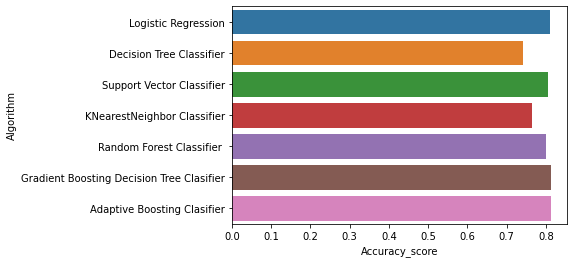

In [199]:
sns.barplot(y=data.Algorithm, x = data.Accuracy_score)

## Observation
**1. By observing the above table we can say that Accuracy of Gradient Boosting Decision Tree Clasifier and Adaptive Boosting Classifier is more i.e. 81.31% compaired to other algorithms.**

**2. By observing the table Logistic Regression, Support Vector Clasifier, Random Forest Classifier gives the accuracy approximatly 80%.**

**3. Gradient Boosting Decision Tree Clasifier and Adaptive Boosting Clasifier gives the similar accuracy i.e. 81.31%.**
 
**4. By compairing all algorithms we can easily says that Gradient Boosting Decision Tree Clasifier and Adaptive Boosting Clasifieris are the best algorithm for Churn prediction .**

## Conclusion
**Gradient Boosting Decision Tree Clasifier and Adaptive Boosting Clasifieris are the best algorithm for Churn prediction.**

In [200]:
y.value_counts(normalize = True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

In [201]:
y_test.value_counts(normalize = True)

No     0.743896
Yes    0.256104
Name: Churn, dtype: float64

In [202]:
X_test_transformed.count()

SeniorCitizen                            1761
tenure                                   1761
MonthlyCharges                           1761
TotalCharges                             1761
gender_Male                              1761
Partner_Yes                              1761
Dependents_Yes                           1761
PhoneService_Yes                         1761
MultipleLines_No phone service           1761
MultipleLines_Yes                        1761
InternetService_Fiber optic              1761
InternetService_No                       1761
OnlineSecurity_No internet service       1761
OnlineSecurity_Yes                       1761
OnlineBackup_No internet service         1761
OnlineBackup_Yes                         1761
DeviceProtection_No internet service     1761
DeviceProtection_Yes                     1761
TechSupport_No internet service          1761
TechSupport_Yes                          1761
StreamingTV_No internet service          1761
StreamingTV_Yes                   

In [203]:
x = y_test.value_counts()
x

No     1310
Yes     451
Name: Churn, dtype: int64

In [204]:
len(X_test_transformed)

1761

In [205]:
 1310/1761

0.7438955139125497

No     1310
Yes     451
Name: Churn, dtype: int64


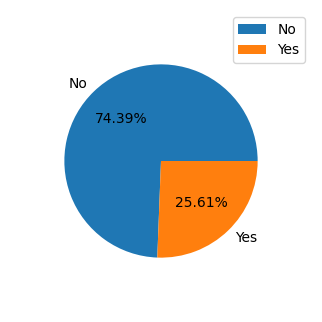

In [206]:
x = y_test.value_counts()
print(x)

plt.figure(figsize=(4,4), dpi = 100)
plt.pie(x, labels=('No','Yes'), autopct='%.2f%%', radius=0.8)
plt.legend(loc = 'upper right')
plt.show();
